In [1]:
#Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import pickle

#Functionalities
from collections import Counter
import sys, os
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

# Explicability
import shap

# Model
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# Métrics
from sklearn.metrics import (roc_curve, roc_auc_score, f1_score , confusion_matrix, recall_score, 
                             precision_score, classification_report, precision_recall_curve, accuracy_score)
from lightgbm import plot_importance

sys.path.append(os.path.abspath('..'))
from src.preprocess.preprocessor import TextPreprocessor
from src.models.train import train_model, optimize_model
from src.models.metrics import evaluate_model
from src.visualization.analysis import model_analysis

# Results & Interpretability

In [2]:
# load data
df = pd.read_csv('../data/processed/fake_or_real_news_clean.csv')

# train test split
xtrain, xtest, ytrain, ytest = train_test_split(df['text_clean'], df['label'], test_size=0.2, random_state=0, stratify=df['label'])

In [3]:
model = pickle.load(open('../models/LGBMClassifier_optimized.pkl', 'rb'))
ypred = model.predict(xtest)
ypred_proba = model.predict_proba(xtest)

## Model analysis
We will be analyzing the next features about our model:
- Confusion matrix: Allows us to visualize the results obtained per class. In our case, our model identified 92% of positive-class news and 95% of negative-class news correctly.
- ROC Curve: higher area under the curve (ROC-$AUC$) means our model is more skilled. Baseline model will always have a continuous slope of 1 and the further away from it we get, the better our model will perform
- Cumulative gains curve
- Lift curve
- PR Curve
- Feature importance: which words have had a higher impact on deciding the output declared by our model, such as $october$ and $campaign$

ROC-AUC score of the model: 0.9792119268336176
Accuracy of the model: 0.9318541996830428

Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       631
           1       0.95      0.92      0.93       631

    accuracy                           0.93      1262
   macro avg       0.93      0.93      0.93      1262
weighted avg       0.93      0.93      0.93      1262


Confusion matrix: 
[[598  33]
 [ 53 578]]



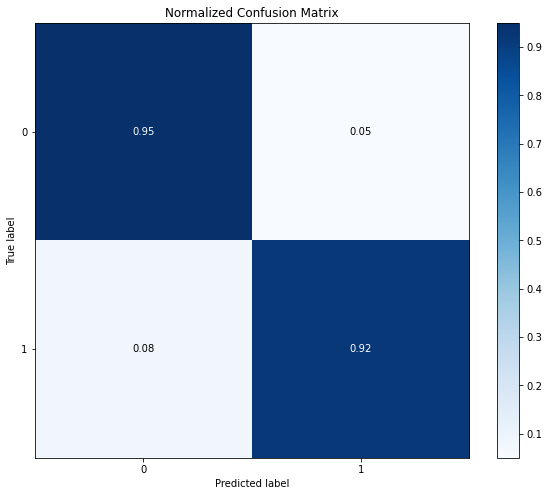

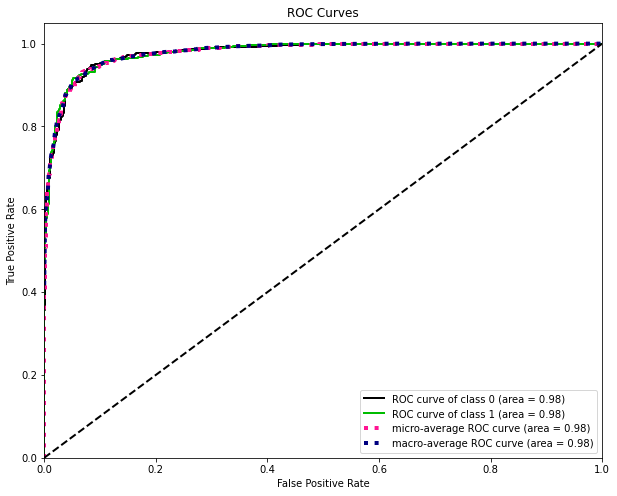

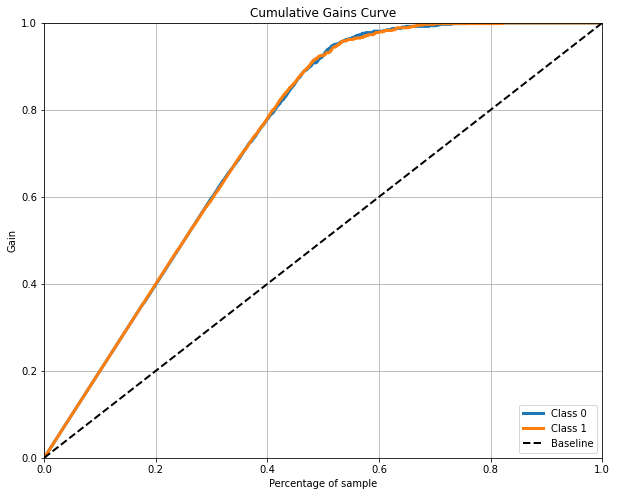

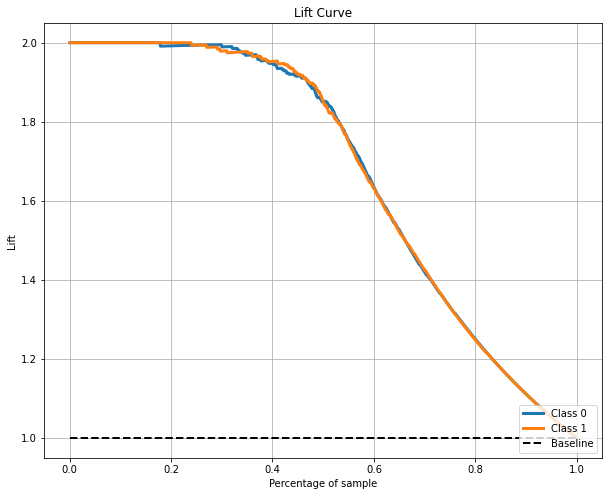

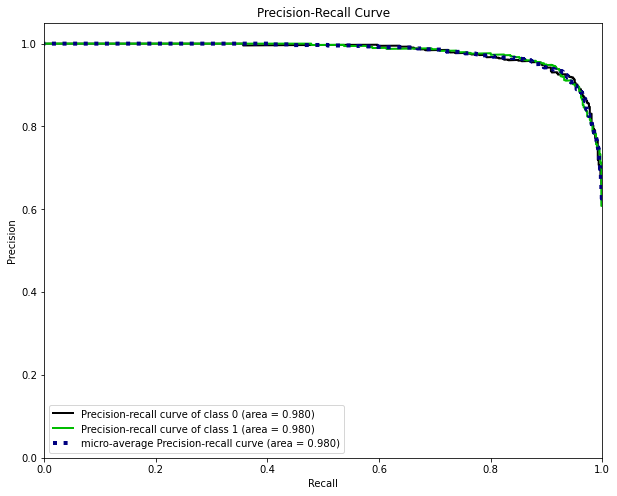

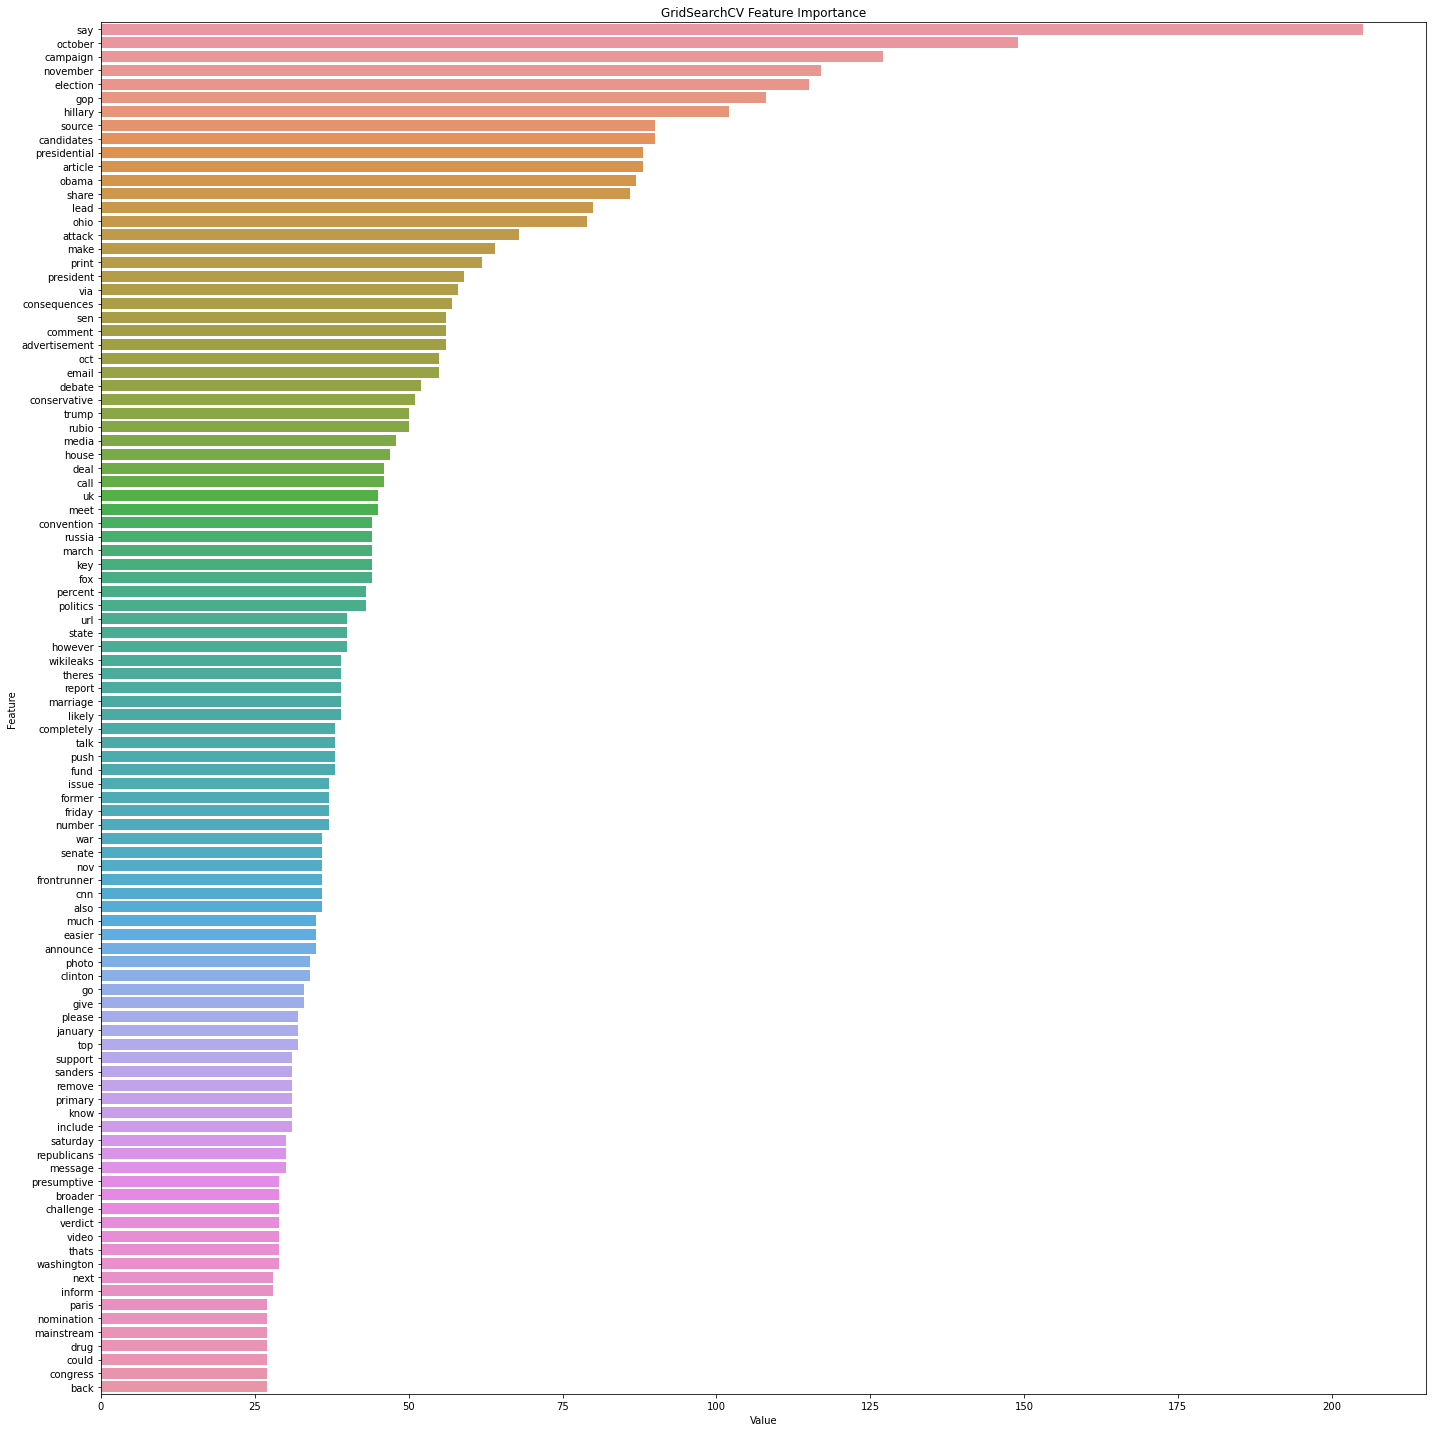

In [4]:
model_analysis(model, ypred, ypred_proba, ytest)